<img src="../img/title.png" height="0.0002" width="700">

<img src="../img/congress.png" height="0.0002" width=750>

<img src="../img/usa_rib.png" height="0.0002" width="400">

<h3> About this project  </h3>

@author : Thibaud Vienne <br/>

<h3> Summary </h3>

The goal of this project is to study 114th congress US senators votes using machine Learning. This project will try to do the following : 
- Explore US senators votes behaviours according to their party.
- Study US Senators similarities and differences based on their votes for several purposed motions.
- Clusterize US senators using their votes and K-means clustering algorithm.
- Establish a US senators cartography which graphically shows senators similarities and differences.
- Looking at some famous US senators voting behaviours.

<img src="../img/senators.png" height="0.0002" width="8000">

<h3> About Data </h3><br/>
Used Data has been scrapped from https://www.senate.gov.
- First Dataset named <i>"114_congress.csv"</i> contains US senators votes based on 15 amendments which have been examinated by senate on year 2015.
- Second Dataset named <i>"votes_description_114_1.csv"</i> gives more information about all amendments that have been examinated by senators during year 2015

<img src="../img/usa_rib.png" height="0.0002" width="400">

<h1>1. Requirements and data Importation </h1> 

<h3>Modules requirements </h3>

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from IPython.display import display, HTML
from sklearn.decomposition import PCA

# Own modules
import functions as func
import numpy as np

<h3>US Senators votes data Importation </h3><br/>
Used data contains 114th congress (year 2015) roll call votes on 15 different purposed motions. For each senator, idata specifies: 
- His name, his state.
- His party : "R" stand for republicans, "D" for democrats and "I" for independants.
- His votes for the 15 motions. 0.0 = disagree, 1.0 = agree, 0.5 = absent/abstention/unknown

In [2]:
# Load data
votes = pd.read_csv("../data/114_congress.csv")
voted_motions = [int(motion) for motion in votes.columns[3:]]

# Rename columns and display
votes = func.map_motions_columns(votes)
votes.head(10)

,name,party,state,motion_1,motion_4,motion_5,motion_6,motion_7,motion_8,motion_9,motion_10,motion_20,motion_26,motion_32,motion_38,motion_39,motion_44,motion_47
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,Blumenthal,D,CT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
6,Blunt,R,MO,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7,Booker,D,NJ,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
8,Boozman,R,AR,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9,Boxer,D,CA,0.5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


<h3>More Details about debated motions </h3><br/>
Using second dataset, we can describe the 15 voted motions purposed in the first dataset.

In [3]:
# Load amendments details dataset : 
all_motions = pd.read_csv("../data/votes_description_114_1.csv", sep=";")

# Extract import amendments : 
votes_description = all_motions[all_motions["vote_id"].isin(voted_motions)]\
                    [["vote_id", "vote_date", "title", "yeas", "nays"]]
print(votes_description.to_string(index=False))

votes_description.to_csv("vote_description.csv")

vote_id vote_date                                              title  yeas  nays
     47    29-Jan  Markey Amdt. No. 141, To delay the effective d...    36    62
     44    29-Jan  Udall Amdt. No. 77, To establish a renewable e...    45    53
     39    28-Jan  Murkowski Amdt. No. 166, To release certain wi...    50    48
     38    28-Jan  Coons Amdt. No. 115, To express the sense of C...    47    51
     32    28-Jan  Peters Amdt. No. 70, To require that the Admin...    40    58
     26    22-Jan  Motion to Table Whitehouse Amdt. No. 28, To re...    52    43
     20    22-Jan  Blunt Amdt. No. 78 As Modified, To express the...    51    46
     10    21-Jan  Whitehouse Amdt. No. 29, To express the sense ...    98     1
      9    21-Jan  Toomey Amdt. No. 41, To continue cleaning up f...    54    45
      8    21-Jan  Durbin Amdt. No. 69, To ensure that the storag...    41    58
      7    21-Jan  Lee Amdt. No. 33, To conform citizen suits und...    54    45
      6    20-Jan  Portman A

<h1> 2. Data Exploration and cleaning </h1>

<h3> The senate repartition </h3>

There are 3 politic partys in the 114th senatorial congress :
['R', 'D', 'I']



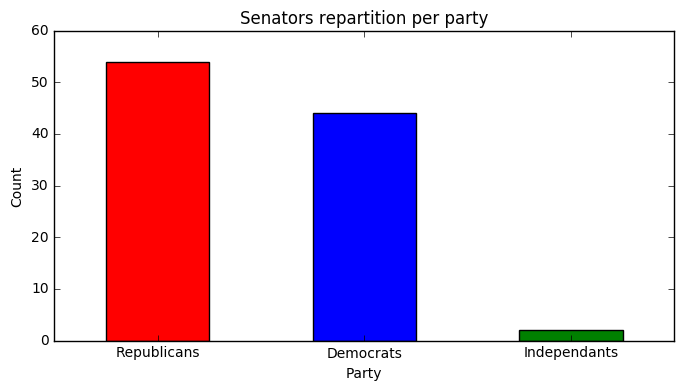

In [4]:
# Are there several political partys? Other than republican and democrat?
distinct_party_count = votes["party"].value_counts()
print("There are %s politic partys in the 114th senatorial congress :" % distinct_party_count.shape[0])
print("%s\n" % list(distinct_party_count.index))

# Visualization
plt.close('all')
plt.figure(figsize=[8,4])
distinct_party_count.plot.bar(color="rbg")
plt.xlabel("Party")
plt.ylabel("Count")
plt.xticks(np.arange(3), ["Republicans", "Democrats", "Independants"], rotation=0, ha="center")
plt.title("Senators repartition per party")
plt.show()

<h3> Exploring four different motions votes </h3>

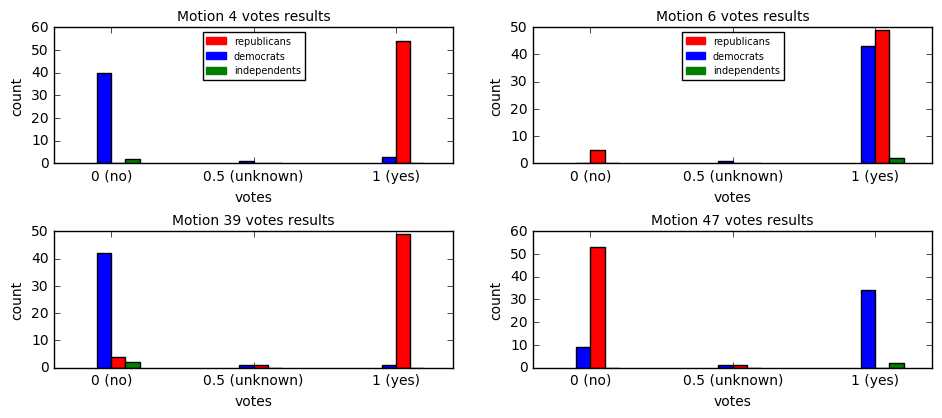

In [5]:
# Crosstabs for motions 4, 6, 26 and 47
cross_4 = pd.crosstab(votes["motion_4"], votes["party"])
cross_6 = pd.crosstab(votes["motion_6"], votes["party"])
cross_39 = pd.crosstab(votes["motion_39"], votes["party"])
cross_47 = pd.crosstab(votes["motion_47"], votes["party"])

# Plot results
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=[10,4.5])
plt.tight_layout(pad=3.0)
func.plot_party_cross(ax1, cross_4, "4", True)
func.plot_party_cross(ax2, cross_6, "6", True)
func.plot_party_cross(ax3, cross_39, "39")
func.plot_party_cross(ax4, cross_47, "47")
plt.show()

<h3> Searching and remove absent senators </h3><br/>
Some senators might have a high abstention rate and have to be removed from dataset.
Do you agree, misters Reid and Rubio?

<img src="../img/reid_rubio.png" height="0.0002" width="350"><br/>

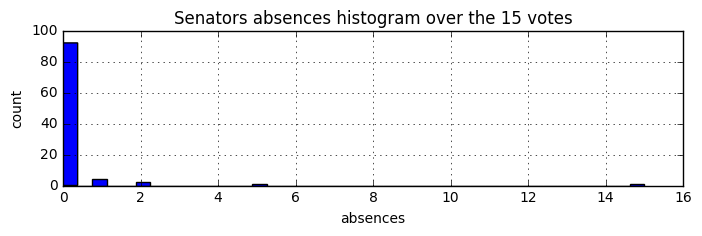

,name,party,state,absences
74,Reid,D,NV,15
78,Rubio,R,FL,5


In [6]:
# Plotting senators absences over the 15 motions
votes["absences"] = votes.apply(lambda row : int(func.count_absent_votes(row)), axis=1)
plt.figure(figsize=[8,2])
votes["absences"].hist(bins = 40)
plt.xlabel("absences")
plt.ylabel("count")
plt.title("Senators absences histogram over the 15 votes")
plt.show()

# Get absent senators names and remove them from dataset
absent_senators = votes[votes["absences"] > 4]
votes_cleaned = votes[votes["absences"] <= 4]
absent_senators[["name", "party", "state", "absences"]]

<h3> Who are the two independant senators? </h3><br/>
According to the previous results, there are two independant senators in the 114th Congress. Theirs names are Angus King and Bernie Sanders.
<img src="../img/king_sanders.png" height="0.0002" width="400">

In [7]:
independants = votes_cleaned[votes_cleaned["party"] == "I"]
independants[["name", "party", "state", "absences"]]

,name,party,state,absences
50,King,I,ME,0
79,Sanders,I,VT,0


<h3>Searching for some famous senators </h3>

<img src="../img/senators.png" height="0.0002" width="8000">

In [8]:
famous_list = ["Trump", "Cruz", "Kasich", "Rubio", "Santorum", "Paul", "Huckabee", "Fiorina",
               "Christie", "Gilmore", "Bush", "Carson", "Clinton", "Sanders", "Webb", "O'Malley",
               "Chafee", "Lessig", "McCain", "Obama", "Romney", "Bush", "Kerry", 
               "Reid", "Durbin", "Underwood"]

famous_senators = votes_cleaned[votes_cleaned["name"].isin(famous_list)]
print("Following famous senators have been found in dataset :")
famous_senators[["name", "party", "state", "absences"]]

Following famous senators have been found in dataset :


,name,party,state,absences
26,Cruz,R,TX,0
29,Durbin,D,IL,0
58,McCain,R,AZ,0
69,Paul,R,KY,0
79,Sanders,I,VT,0


<h1>3. Similarities and differences between Senators </h1>

<h3> Introducing euclidian distance between senators </h3>

Let introduce an euclidian distance in order to find senators votes similarities. We can do this by calculating the euclidian distance in votes between two senators. The following metrics is defined, between two senators votes as: 

<img src="../img/euclidian.png" height="0.0002" width="400">
- If two senators votes often agree, the distance between them will be close to 0.0.
- If two senators votes often disagree, the distance between will be close to sqrt(15.0).


In [9]:
def calculate_distance_name(votes, senator_name_1, senator_name_2):
    """
    Computes euclidian distance between two senators based on their vote for different laws 
    given their respective names.
    """
    senator_1_votes = votes[votes["name"] == senator_name_1].iloc[0,3:].reshape(1, -1)
    senator_2_votes = votes[votes["name"] == senator_name_2].iloc[0,3:].reshape(1, -1)
    distance = float(euclidean_distances(senator_1_votes, senator_2_votes)[0])
    return distance

<h3> Calculating some distances between senators </h3>

In [10]:
d_mccain_cruz = calculate_distance_name(votes_cleaned, "McCain", "Cruz")
d_durbin_baldwin = calculate_distance_name(votes_cleaned, "Durbin", "Baldwin")
d_mccain_durbin = calculate_distance_name(votes_cleaned, "McCain", "Durbin")
d_cruz_sanders = calculate_distance_name(votes_cleaned, "Cruz", "Sanders")

print("Distance between McCain and Cruz (both republican senators) : %s" % d_mccain_cruz)
print("Distance between Durbin and Baldwin (both democrat senators) : %s" % d_durbin_baldwin)
print("Distance between Mccain and Durbin (republican vs Democrat) : %s" % d_mccain_durbin)
print("Distance between Cruz and Sanders: %s" % d_cruz_sanders)

Distance between McCain and Cruz (both republican senators) : 1.0
Distance between Durbin and Baldwin (both democrat senators) : 0.0
Distance between Mccain and Durbin (republican vs Democrat) : 3.605551275463989
Distance between Cruz and Sanders: 3.7416573867739413


<h3> About Angus King : is he closer to democrats or republicans? </h3><br/>
We can compare the mean distance with republicans party senators and the mean distance with democrat party senators.

<img src="../img/where_king.png" height="0.0002" width="500">

In [11]:
# Calculate distances King-democrats and distances King-republicans
dem_mean_distance, rep_mean_distance = func.distance_sen_dem_rep(votes_cleaned, "King")

# Conclusion
print("Distance between Angus King and Democrats : %s" % dem_mean_distance)
print("Distance between Angus King and Republicans : %s" % rep_mean_distance)
print("=> Angus King political convictions are significantely closer \
to democrats than repubicans.")

Distance between Angus King and Democrats : 1.12946034357
Distance between Angus King and Republicans : 3.44249467624
=> Angus King political convictions are significantely closer to democrats than repubicans.


<h1>4. Machine Learning : Clusterize senators into two groups using K-means </h1>

<h3> Clusterizing all senators in two classes using K-means model </h3><br/>
k-means clustering is a method of vector quantization, that is popular for cluster analysis. This algorithm aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. Here an example of the algorithm for k = 3 clusters.
<img src="../img/kmeans.png" height="0.0002" width="700">

In [12]:
kmeans_model = KMeans(n_clusters=2, random_state=15, max_iter=1000, n_init=50)
senator_distances = kmeans_model.fit_transform(votes_cleaned.iloc[:, 3:])

<h3> K-means clusterization results </h3><br/>
K-means algorithm will now assign a cluster (0 or 1) to each senator according to distances between him and clusters centroïds. In case of strong opposition between senators, we should observe that : 
- All republicans should be classified in a same cluster, due to their votes similarities.
- All democrats should be in a cluster, due to their votes differences with republicans.

In [13]:
votes_cleaned["cluster"] = kmeans_model.labels_
cluster_crosstab = pd.crosstab(votes_cleaned["cluster"], votes_cleaned["party"])
print(cluster_crosstab)

party     D  I   R
cluster           
0         2  0  53
1        41  2   0


/Users/Thibaud/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<h3> Who are the two democrats in republican-related cluster? </h3><br/>
Democrat senators Manchin and Heitkamp seem to have republicans voting behaviours.
<img src="../img/manchin_heitkamp.png" height="0.0002" width="350">

In [14]:
wrong_cluster = int(cluster_crosstab[cluster_crosstab["D"] == 2].index[0])
wrong_democrats = votes_cleaned[(votes_cleaned["cluster"] == wrong_cluster) & (votes_cleaned["party"] == "D")]
wrong_democrats[["name", "party", "state", "cluster"]]

,name,party,state,cluster
42,Heitkamp,D,ND,0
56,Manchin,D,WV,0


<h3> Senators Opinions cartography </h3>

/Users/Thibaud/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Thibaud/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


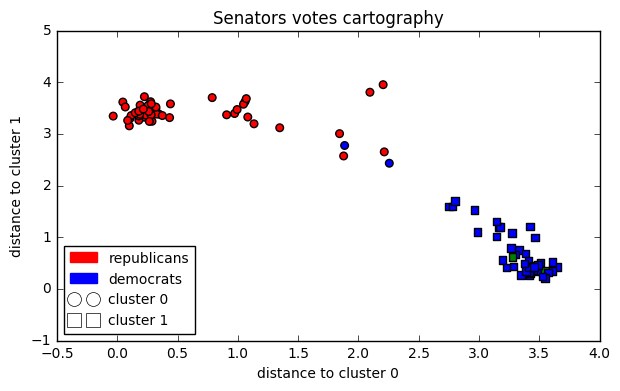

In [15]:
# Get senators distances to clusters and add a white gaussian noise jitter.
clust0 = senator_distances[:,0].reshape((-1, 1))
clust1 = senator_distances[:,1].reshape((-1, 1))
votes_cleaned["clust0_jitter"] =  clust0 + np.random.normal(0.0, 0.1, size=clust0.shape)
votes_cleaned["clust1_jitter"] = clust1 + np.random.normal(0.0, 0.1, size=clust1.shape)

# Plotting results
plt.close('all')     
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=[7,4])
func.plot_cartography(ax, votes_cleaned, True)
ax.set_title("Senators votes cartography")
plt.show()

<h3> Find famous senators opinions </h3>

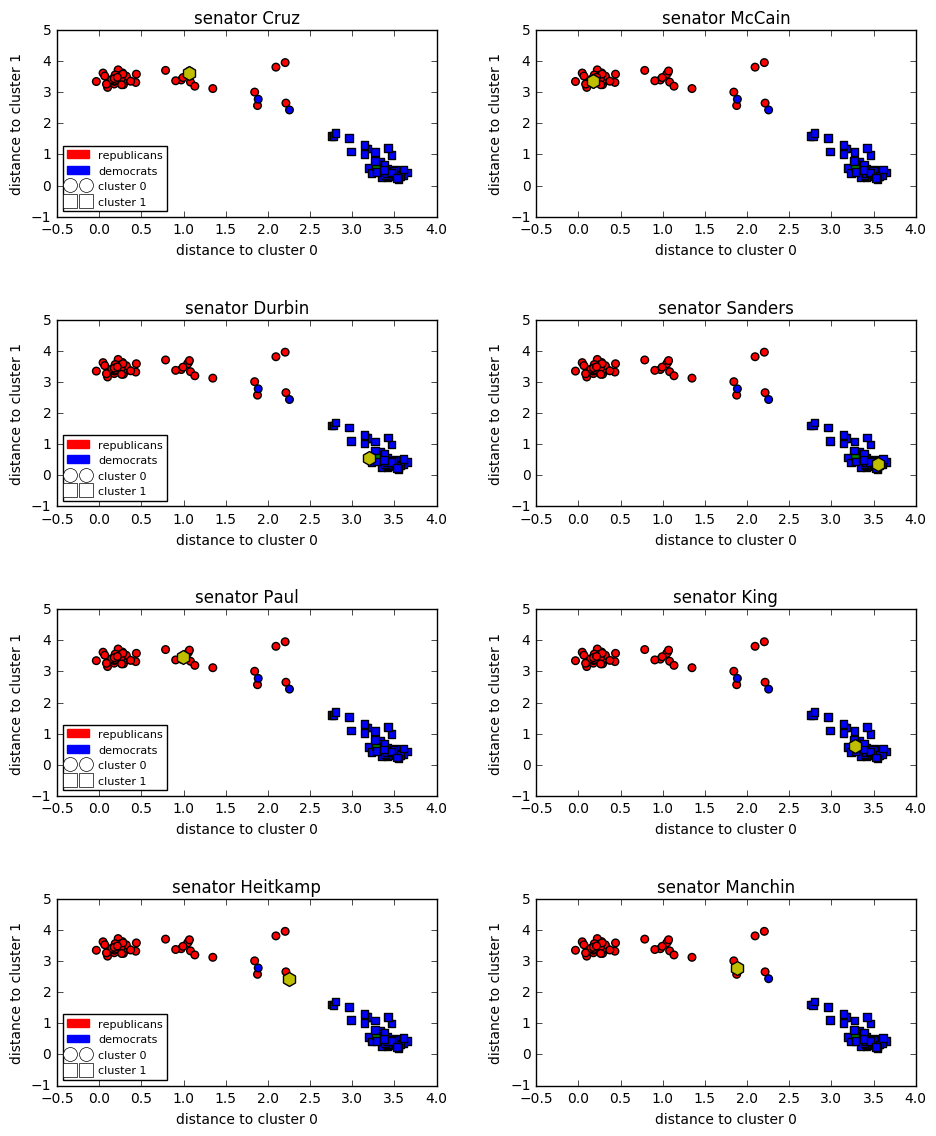

In [16]:
# Finding famous senators
famous = ["Cruz", "McCain", "Durbin", "Sanders", "Paul", "King"]

# Plot results
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=[10,12])
func.plot_senator(ax1, votes_cleaned, "Cruz", "senator Cruz", True, 8)
func.plot_senator(ax2, votes_cleaned, "McCain", "senator McCain")
func.plot_senator(ax3, votes_cleaned, "Durbin", "senator Durbin", True, 8)
func.plot_senator(ax4, votes_cleaned, "Sanders", "senator Sanders")
func.plot_senator(ax5, votes_cleaned, "Paul", "senator Paul", True, 8)
func.plot_senator(ax6, votes_cleaned, "King", "senator King")
func.plot_senator(ax7, votes_cleaned, "Heitkamp", "senator Heitkamp", True, 8)
func.plot_senator(ax8, votes_cleaned, "Manchin", "senator Manchin")
plt.tight_layout(pad=3.0)
plt.show()

<h1>5. Machine Learning : Using PCA </h1>

<h3> Exploring PCA explained variance </h3>

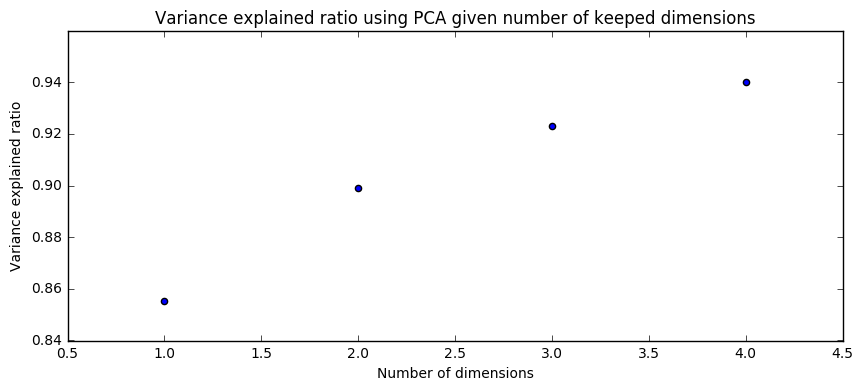

In [17]:
# Preprocessing data
motions_variables = [var for var in votes_cleaned.columns if "motion" in var]
x_pca = votes_cleaned[motions_variables]

# PCA
n_components = 4
pca = PCA(n_components=n_components).fit(x_pca)
y_pca = pca.transform(x_pca)

# Variance Explained
variance_exp = list(pca.explained_variance_ratio_)
variance_exp_cumuled= [sum(variance_exp[0:i+1]) for i in range(0, len(variance_exp))]

# Plotting explained variance
plt.figure(figsize=[10,4])
plt.scatter(range(1, len(variance_exp_cumuled)+1), variance_exp_cumuled)
plt.xlabel("Number of dimensions")
plt.ylabel("Variance explained ratio")
plt.title("Variance explained ratio using PCA given number of keeped dimensions")
plt.show()

<h3> Transform senators votes to PCA features </h3>

In [18]:
# adding dimensions coordinated to pca_df
pca_dim_columns = ["dim_%s" % i for i in range(1, n_components + 1)]
pca_df = votes_cleaned[["name", "party", "state"]].reset_index()
y_pca_df = pd.DataFrame(y_pca, columns=pca_dim_columns).reset_index()
pca_df = pd.concat([pca_df, y_pca_df], axis=1)

# adding some jitter to differencites senators : 
for i in range(1, n_components + 1):
    pca_df["dim_%s" % i] = pca_df["dim_%s" % i] + np.random.normal(0.0, 0.05, size=pca_df["dim_%s" % i].shape)

<h3> PCA 2D plotting </h3>

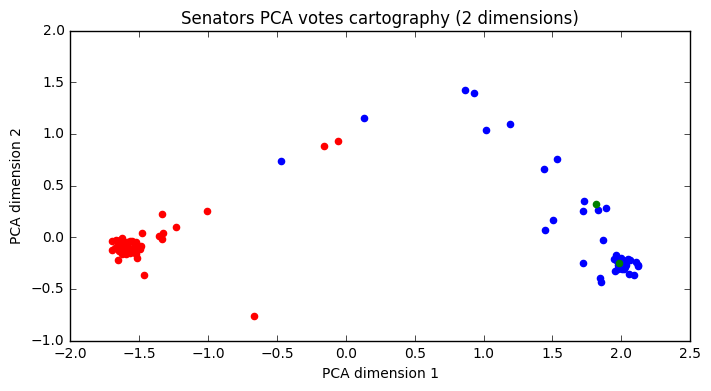

In [19]:
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=[8,4])
func.plot_pca(ax, pca_df)
ax.set_title("Senators PCA votes cartography (2 dimensions)")
plt.show()

<h3> PCA 3D plotting </h3>

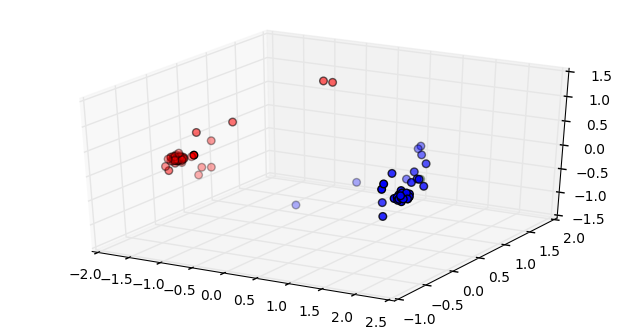

In [20]:
fig = plt.figure(figsize=[8,4])
ax = fig.gca(projection="3d")
func.plot_pca_3d(ax, pca_df)
plt.show()

<h3> PCA features comonents</h3>

In [21]:
mo_variables = [var[7:] for var in motions_variables]
pca_features_index = ["dim_%s" % i for i in range(1, pca.components_.shape[0] + 1)]
components = pd.DataFrame(pca.components_, columns=mo_variables, index=pca_features_index)
components = components.apply(lambda row: ["%.3f" % el for el in row], axis=1)
components

,1,4,5,6,7,8,9,10,20,26,32,38,39,44,47
dim_1,0.227,-0.287,-0.287,0.029,-0.291,0.279,-0.282,0.006,-0.287,-0.280,0.272,0.290,-0.283,0.273,0.259
dim_2,-0.541,-0.000,-0.152,0.022,-0.147,-0.312,-0.158,0.006,-0.236,-0.181,-0.366,0.277,-0.267,0.037,-0.410
dim_3,0.040,0.113,0.404,0.087,0.348,0.048,-0.394,0.003,-0.121,0.402,-0.032,-0.008,-0.266,0.532,-0.071
dim_4,-0.709,-0.175,0.009,0.010,0.009,0.356,0.253,-0.002,0.090,0.000,0.162,-0.104,0.202,0.387,0.199


<h3> Compare "centered" democrats with the democrat leader </h3>

In [22]:
columns = ["name", "party"] + mo_variables
centered_democrats = pca_df[(pca_df["party"] == "D") & (pca_df["dim_1"] < 0.5)]
interesting_democrats

NameError: name 'interesting_democrats' is not defined

In [ ]:
columns_to_take = ["name", "party"] + motions_variables
some_democrats = votes_cleaned[votes_cleaned["name"].isin(["Durbin", "Heitkamp", "Manchin"])][columns_to_take]
some_democrats.columns = ["name", "party"] + mo_variables
some_democrats

<img src="../img/usa_rib.png" height="0.0002" width="400">